### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading and EDA
- Load the dataset
- Display the first five rows
- List the columns name
- Check the info
- Check the mathematical discribtion of the dataset
- Check the shape of the dataset
- Remove id columns
- Check for null values
- Check the balance of the target feature
- Get only categorical columns and go deeper 
- Get only numerical features and explore it
- Numerical variables are usually of 2 type
    - Continous variable
    - Discrete Variables
- Check the distribution of continous variables of 20 features only to get some idea about the distribution, whether noraml distributed or not     


In [2]:
df = pd.read_csv('df/df.csv', sep=';')
df.head()

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_epitope_id,Info_nPos,Info_nNeg,Info_cluster,Class,...,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279,feat_esm1b_1280
0,XP_809948.1:15,5693,XP_809948.1,218,E,276453,1,0,18,1,...,-0.177248,-0.275432,0.175780,-2.618115,-0.306478,0.248409,-0.144645,-0.163276,0.101016,0.571763
1,XP_809948.1:15,5693,XP_809948.1,219,E,276453,1,0,18,1,...,-0.089673,-0.258615,0.063662,-2.660741,-0.227916,0.233011,-0.143840,-0.119282,0.146848,0.507656
2,XP_809948.1:15,5693,XP_809948.1,220,D,276453,1,0,18,1,...,-0.037816,-0.205189,0.220458,-2.610207,-0.156326,0.231606,0.251916,0.077030,0.326192,0.071661
3,XP_809948.1:15,5693,XP_809948.1,221,N,276453,1,0,18,1,...,-0.249216,-0.211748,-0.130716,-2.598186,-0.130838,-0.026848,0.167203,-0.394126,0.222274,0.376358
4,XP_809948.1:15,5693,XP_809948.1,222,E,276453,1,0,18,1,...,-0.039318,-0.250912,-0.093870,-2.414023,-0.253500,0.118345,-0.160718,-0.076750,0.448067,0.326883


In [3]:
## list all the columns
df.columns

Index(['Info_PepID', 'Info_organism_id', 'Info_protein_id', 'Info_pos',
       'Info_AA', 'Info_epitope_id', 'Info_nPos', 'Info_nNeg', 'Info_cluster',
       'Class',
       ...
       'feat_esm1b_1271', 'feat_esm1b_1272', 'feat_esm1b_1273',
       'feat_esm1b_1274', 'feat_esm1b_1275', 'feat_esm1b_1276',
       'feat_esm1b_1277', 'feat_esm1b_1278', 'feat_esm1b_1279',
       'feat_esm1b_1280'],
      dtype='object', length=1291)

In [4]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49606 entries, 0 to 49605
Columns: 1291 entries, Info_PepID to feat_esm1b_1280
dtypes: float64(1281), int64(4), object(6)
memory usage: 488.6+ MB


In [5]:
# check statistical description of data
df.describe()

,Info_organism_id,Info_pos,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,...,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279,feat_esm1b_1280
count,49606.0,49606.000000,49606.000000,49606.000000,49522.000000,49523.000000,49523.000000,49523.000000,49523.000000,49523.000000,...,49521.000000,49520.000000,49524.000000,49520.000000,49527.000000,49522.000000,49521.000000,49523.000000,49525.000000,49524.000000
mean,5693.0,446.149034,139.889469,-0.967383,0.040612,0.149928,0.069099,0.079165,0.024519,-0.137498,...,-0.093252,-0.154691,0.067418,-1.125989,-0.137292,0.036706,0.015572,-0.082436,0.248405,0.091574
std,0.0,643.758192,77.525359,0.253321,0.196273,0.181744,0.205917,0.184680,0.193929,0.193766,...,0.187744,0.213362,0.199268,0.750110,0.219276,0.208201,0.194232,0.230151,0.272975,0.187875
min,5693.0,1.000000,7.000000,-1.000000,-0.985646,-1.240288,-0.986003,-1.290777,-1.012835,-1.559586,...,-1.019991,-1.210598,-0.977556,-3.004328,-1.057963,-1.024662,-0.953820,-1.189411,-1.502582,-0.921677
25%,5693.0,126.000000,71.000000,-1.000000,-0.085853,0.040445,-0.060949,-0.039753,-0.096460,-0.262736,...,-0.212362,-0.295248,-0.048585,-1.675730,-0.300492,-0.099466,-0.089751,-0.239451,0.113720,-0.027901
50%,5693.0,251.000000,145.000000,-1.000000,0.033002,0.146171,0.069329,0.084941,0.037249,-0.135379,...,-0.091373,-0.151224,0.066127,-1.206485,-0.145676,0.031547,0.029160,-0.076100,0.287131,0.086134
75%,5693.0,463.000000,205.000000,-1.000000,0.158857,0.255763,0.202764,0.203351,0.155371,-0.011303,...,0.026781,-0.012528,0.181142,-0.687328,0.002344,0.165156,0.135396,0.077408,0.428584,0.205675
max,5693.0,4841.000000,283.000000,1.000000,1.290553,1.203393,1.017387,1.217404,0.935810,0.905849,...,0.708338,0.880500,1.313778,2.234913,1.142386,1.107519,0.885712,1.041784,1.279979,1.301746


In [6]:
# check shape of the data
df.shape

(49606, 1291)

In [7]:
## remove ids columns, cause it is not important in model training
ids_columns = ['Info_PepID', 'Info_organism_id', 'Info_protein_id','Info_epitope_id']
df.drop(ids_columns, axis=1, inplace=True)

In [8]:
df.shape

(49606, 1287)

In [9]:
# check for null values
df.isnull().sum()

Info_pos            0
Info_AA             0
Info_nPos           0
Info_nNeg           0
Info_cluster        0
                   ..
feat_esm1b_1276    84
feat_esm1b_1277    85
feat_esm1b_1278    83
feat_esm1b_1279    81
feat_esm1b_1280    82
Length: 1287, dtype: int64

In [10]:
null_columns = df.columns[df.isnull().any()]
null_columns

Index(['feat_esm1b_0', 'feat_esm1b_1', 'feat_esm1b_2', 'feat_esm1b_3',
       'feat_esm1b_4', 'feat_esm1b_5', 'feat_esm1b_6', 'feat_esm1b_7',
       'feat_esm1b_8', 'feat_esm1b_9',
       ...
       'feat_esm1b_1271', 'feat_esm1b_1272', 'feat_esm1b_1273',
       'feat_esm1b_1274', 'feat_esm1b_1275', 'feat_esm1b_1276',
       'feat_esm1b_1277', 'feat_esm1b_1278', 'feat_esm1b_1279',
       'feat_esm1b_1280'],
      dtype='object', length=1281)

In [11]:
## Check the balance of the target feature
df.Class.value_counts()

-1    48797
 1      809
Name: Class, dtype: int64

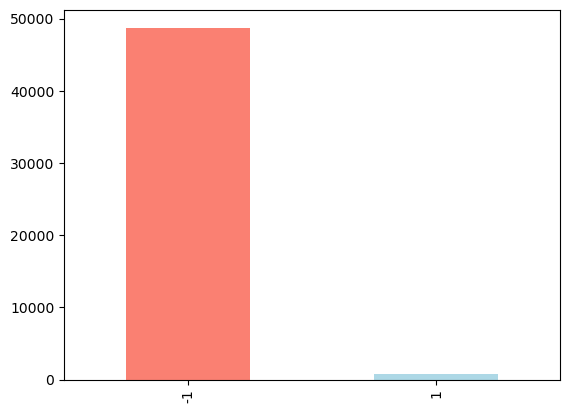

In [12]:
df.Class.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [13]:
# lets replace -1 to 0
df.replace({'Class': {-1: 0}}, inplace=True)

In [14]:
df.Class.unique()

array([1, 0], dtype=int64)

In [15]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Info_AA', 'Info_nPos', 'Info_nNeg'], dtype='object')

In [16]:
df.Info_AA.value_counts()

A    4980
S    4359
E    4318
G    3983
L    3671
T    3631
V    3280
P    2971
R    2701
D    2676
K    2623
Q    2037
N    1990
I    1408
F    1263
H    1006
M     828
Y     799
C     721
W     361
Name: Info_AA, dtype: int64

In [17]:
df.Info_nPos.value_counts()

0              31940
0,0            12672
0,0,0           3317
1                675
0,0,0,0          674
0,0,0,0,0         76
1,1               63
1,0               61
0,1               35
0,1,1             21
1,1,1             18
1,0,0             14
1,1,1,2           10
1,0,1              9
1,1,0              6
0,0,1              4
0,0,0,0,0,0        3
1,0,1,1,2          2
1,0,1,1            2
0,1,1,2            1
1,1,2              1
0,1,0,0            1
0,1,2              1
Name: Info_nPos, dtype: int64

Observation:
- It seems that we might have only 0 and 1 values 
- So we need to convert all the features to 0 or 1

**Performe feature Engineering on Info_nPos feature**
- extract: 0,0,0 -> 0
- extract: 1,1,1 -> 1
- convert object -> int

In [18]:
df['Info_nPos'] = df['Info_nPos'].str.split(',').str[0]

In [19]:
df['Info_nPos'].value_counts()

0    48745
1      861
Name: Info_nPos, dtype: int64

In [20]:
df['Info_nPos'] = df.Info_nPos.astype(int)

In [21]:
df.Info_nPos.dtype

dtype('int32')

In [22]:
df.Info_nNeg.value_counts()

1              31940
1,1            12672
1,1,1           3317
0                675
1,1,1,1          674
1,1,1,1,1         76
0,0               63
0,1               61
1,0               35
1,0,0             22
0,0,0             19
0,1,1             14
0,0,0,0           10
0,1,0              9
0,0,1              6
1,1,0              4
1,1,1,1,1,1        3
0,1,0,0            2
0,1,0,0,0          2
1,0,0,0            1
1,0,1,1            1
Name: Info_nNeg, dtype: int64

**Performe feature Engineering on Info_nNeg feature**
- extract: 0,0,0 -> 0
- extract: 1,1,1 -> 1
- convert object -> int

In [23]:
df['Info_nNeg'] = df['Info_nNeg'].str.split(',').str[0]
df['Info_nNeg'].value_counts()

1    48745
0      861
Name: Info_nNeg, dtype: int64

In [24]:
df['Info_nNeg'] = df.Info_nNeg.astype(int)
df.Info_nNeg.dtype

dtype('int32')

In [25]:
df[categorical_columns].head()

,Info_AA,Info_nPos,Info_nNeg
0,E,1,0
1,E,1,0
2,D,1,0
3,N,1,0
4,E,1,0


In [26]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical_columns

Index(['Info_pos', 'Info_nPos', 'Info_nNeg', 'Info_cluster', 'Class',
       'feat_esm1b_0', 'feat_esm1b_1', 'feat_esm1b_2', 'feat_esm1b_3',
       'feat_esm1b_4',
       ...
       'feat_esm1b_1271', 'feat_esm1b_1272', 'feat_esm1b_1273',
       'feat_esm1b_1274', 'feat_esm1b_1275', 'feat_esm1b_1276',
       'feat_esm1b_1277', 'feat_esm1b_1278', 'feat_esm1b_1279',
       'feat_esm1b_1280'],
      dtype='object', length=1286)

In [27]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
len(numerical_features)

1286

In [28]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


In [29]:
df[discrete_feature].head()

,Info_nPos,Info_nNeg,Class
0,1,0,1
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1


In [30]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 1283


In [31]:
df[continuous_feature].head()

,Info_pos,Info_cluster,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,...,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279,feat_esm1b_1280
0,218,18,0.294185,-0.010953,0.043579,-0.072766,0.235567,-0.055041,-0.495426,-0.154259,...,-0.177248,-0.275432,0.175780,-2.618115,-0.306478,0.248409,-0.144645,-0.163276,0.101016,0.571763
1,219,18,0.260795,0.016828,-0.012012,-0.066855,0.325146,-0.255945,-0.597614,-0.055613,...,-0.089673,-0.258615,0.063662,-2.660741,-0.227916,0.233011,-0.143840,-0.119282,0.146848,0.507656
2,220,18,0.184051,0.305131,0.108189,0.129977,0.452808,-0.308754,-0.500337,-0.115194,...,-0.037816,-0.205189,0.220458,-2.610207,-0.156326,0.231606,0.251916,0.077030,0.326192,0.071661
3,221,18,0.314233,0.128062,0.083666,0.216604,0.312914,-0.370623,-0.347873,0.172393,...,-0.249216,-0.211748,-0.130716,-2.598186,-0.130838,-0.026848,0.167203,-0.394126,0.222274,0.376358
4,222,18,0.096633,0.163431,-0.031337,0.308982,0.290276,-0.513453,-0.365755,-0.188772,...,-0.039318,-0.250912,-0.093870,-2.414023,-0.253500,0.118345,-0.160718,-0.076750,0.448067,0.326883


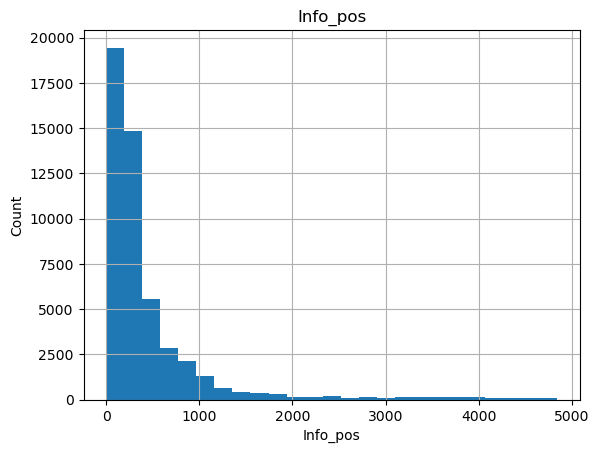

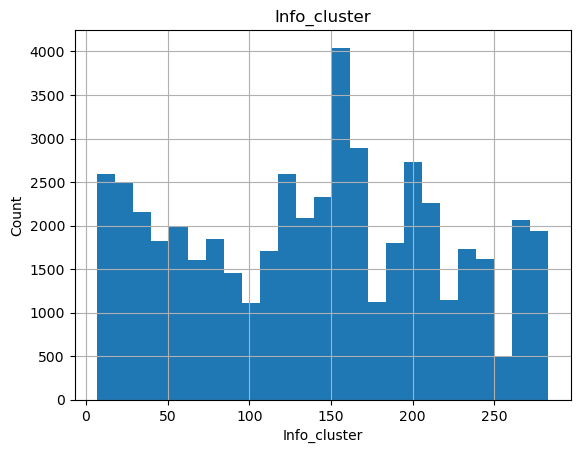

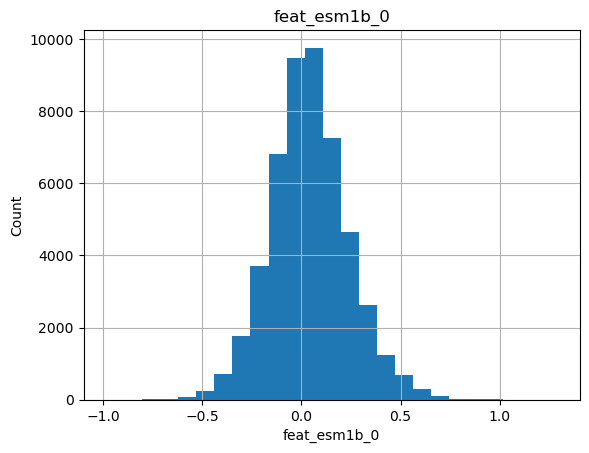

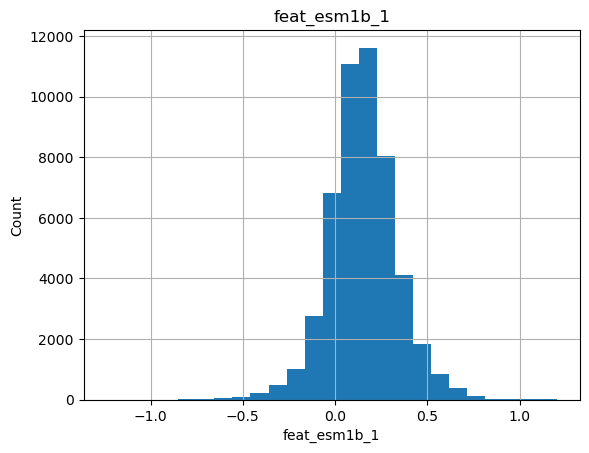

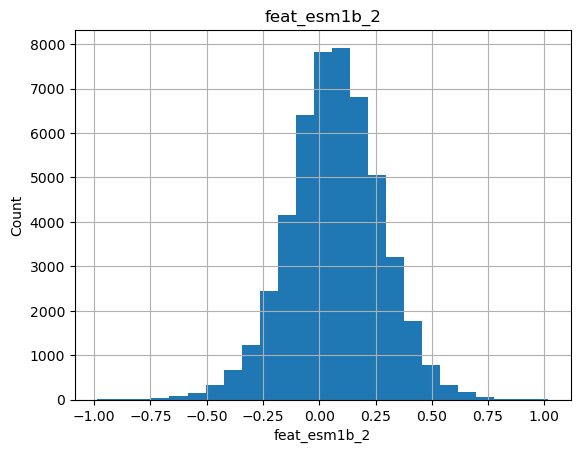

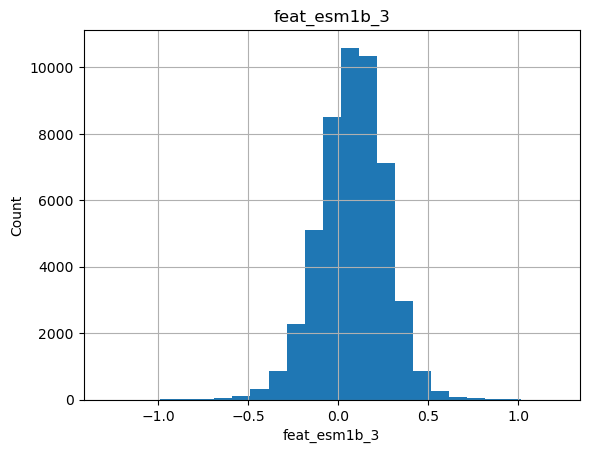

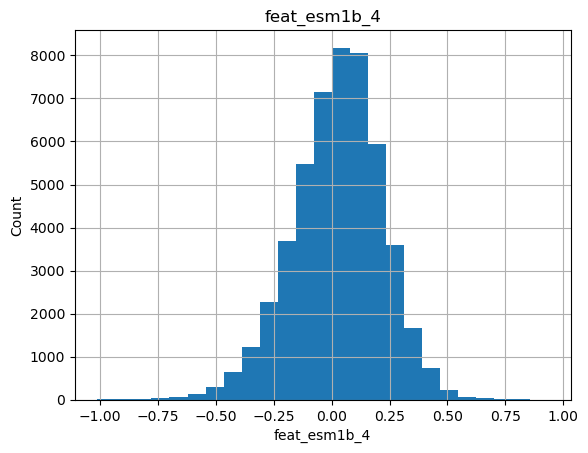

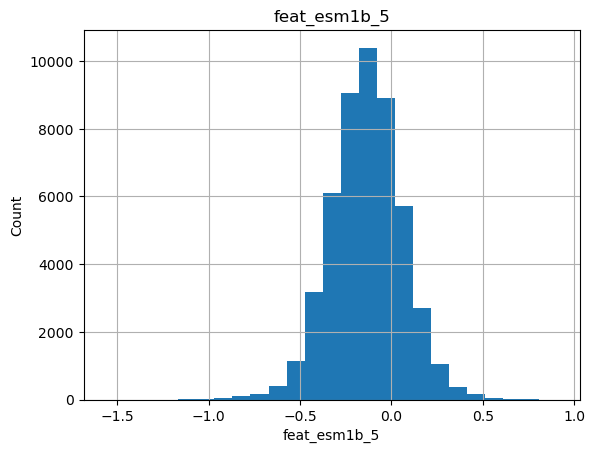

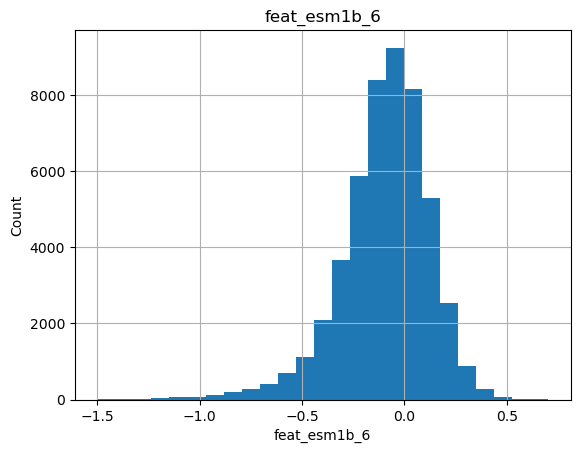

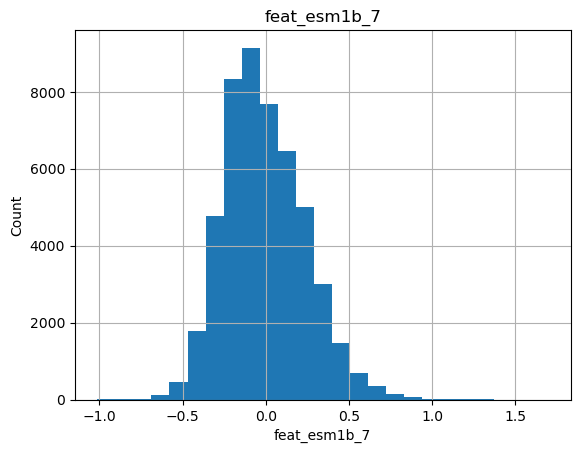

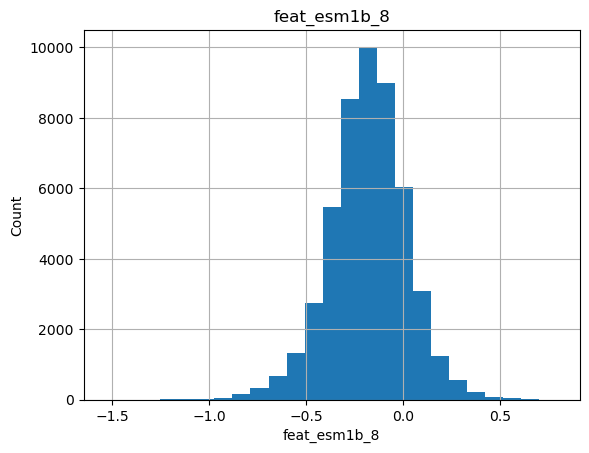

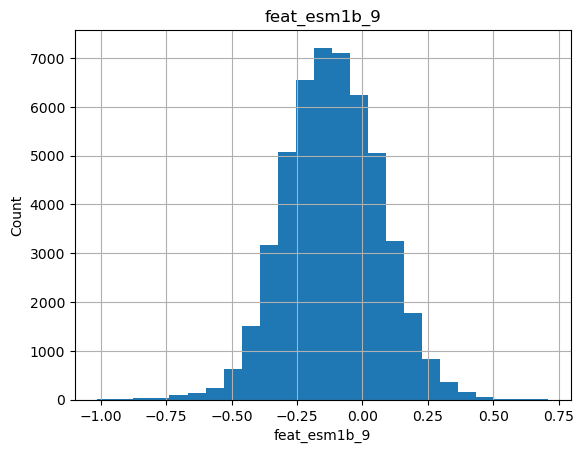

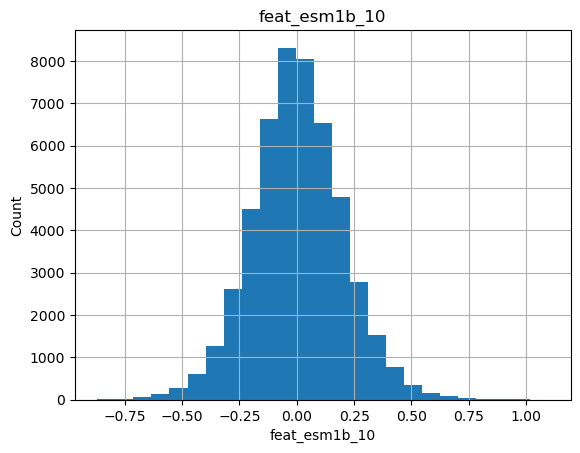

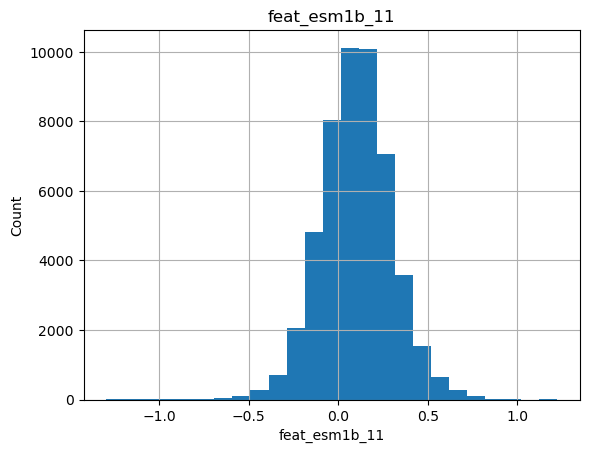

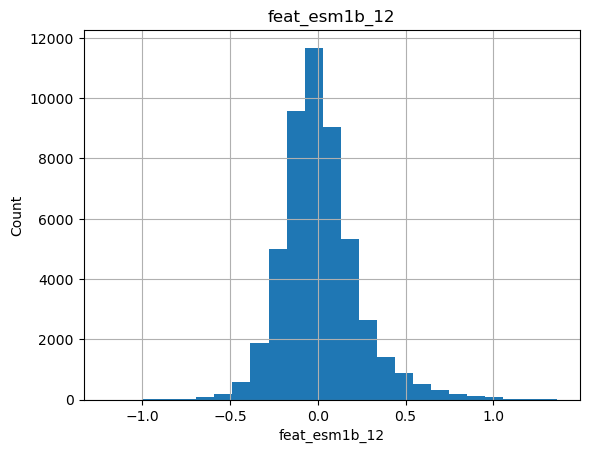

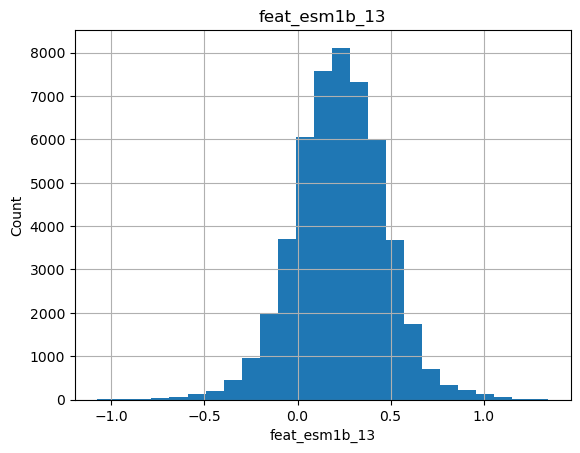

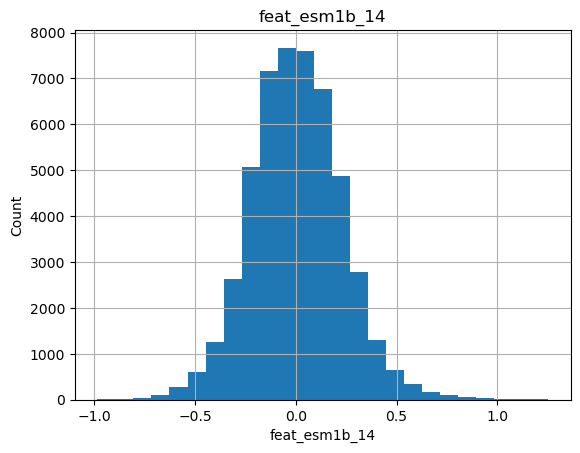

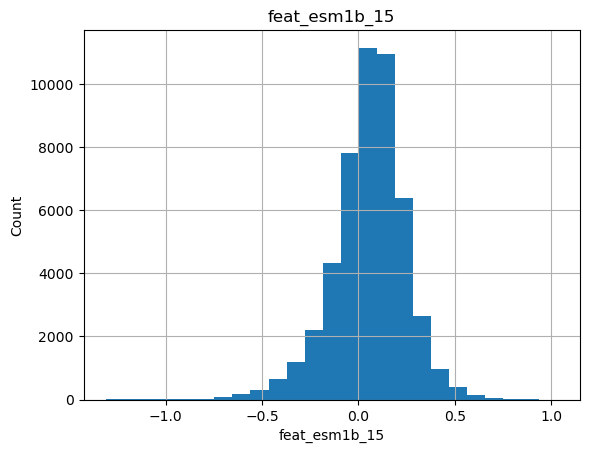

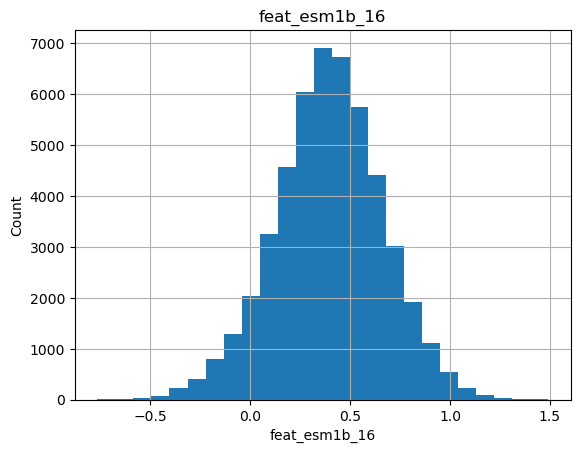

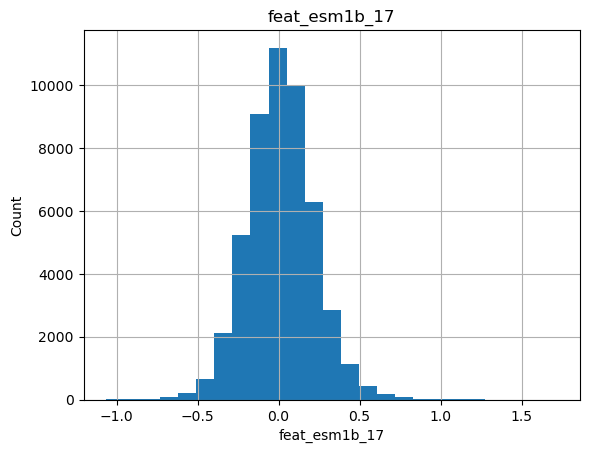

In [32]:
## Lets analyse the continuous values for 20 features by creating histograms to understand the distribution

for feature in continuous_feature[:20]:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

`Note:` Based on the opservation we need to do:
1. Get read of null values
2. Convert feature `Info_AA` from categorical to numerical
3. Balance the dataset
4. Most of the features are normal distributed

### Feature Engineering
- Handling missing values using imputer
- Converting Categorical features into Numerical using label encoder
- Handling imbalance dataset using imblearn library

#### Handling Missing Values

In [33]:
from sklearn.impute import SimpleImputer
# Initialize SimpleImputer with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

In [34]:
# for col in continuous_feature:
df[continuous_feature] = imputer.fit_transform(df[continuous_feature])

In [35]:
df.isnull().sum()

Info_pos           0
Info_AA            0
Info_nPos          0
Info_nNeg          0
Info_cluster       0
                  ..
feat_esm1b_1276    0
feat_esm1b_1277    0
feat_esm1b_1278    0
feat_esm1b_1279    0
feat_esm1b_1280    0
Length: 1287, dtype: int64

#### Converting Categorical features into Numerical

In [36]:
from sklearn.preprocessing import LabelEncoder
 
le = LabelEncoder()

In [37]:
df['Info_AA'] = le.fit_transform(df['Info_AA'])

In [38]:
df['Info_AA'].unique()

array([ 3,  2, 11,  8, 13, 15,  0, 17,  5, 12,  4,  9, 14,  7, 19, 16, 18,
       10,  6,  1])

#### Handling imbalance dataset

In [39]:
from imblearn.under_sampling import RandomUnderSampler

In [40]:
from imblearn.combine import SMOTETomek
os_us = SMOTETomek(random_state=42)


X = df.drop('Class', axis=1)
y = df['Class']

X_1, y_1 = os_us.fit_resample(X, y)

In [41]:
df_new = X_1
df_new['Class'] = y_1

df_new.head()

C:\Users\44787\AppData\Local\Temp\ipykernel_10632\1284558675.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_new['Class'] = y_1


,Info_pos,Info_AA,Info_nPos,Info_nNeg,Info_cluster,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,...,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279,feat_esm1b_1280,Class
0,218.0,3,1,0,18.0,0.294185,-0.010953,0.043579,-0.072766,0.235567,...,-0.275432,0.175780,-2.618115,-0.306478,0.248409,-0.144645,-0.163276,0.101016,0.571763,1
1,219.0,3,1,0,18.0,0.260795,0.016828,-0.012012,-0.066855,0.325146,...,-0.258615,0.063662,-2.660741,-0.227916,0.233011,-0.143840,-0.119282,0.146848,0.507656,1
2,220.0,2,1,0,18.0,0.184051,0.305131,0.108189,0.129977,0.452808,...,-0.205189,0.220458,-2.610207,-0.156326,0.231606,0.251916,0.077030,0.326192,0.071661,1
3,221.0,11,1,0,18.0,0.314233,0.128062,0.083666,0.216604,0.312914,...,-0.211748,-0.130716,-2.598186,-0.130838,-0.026848,0.167203,-0.394126,0.222274,0.376358,1
4,222.0,3,1,0,18.0,0.096633,0.163431,-0.031337,0.308982,0.290276,...,-0.250912,-0.093870,-2.414023,-0.253500,0.118345,-0.160718,-0.076750,0.448067,0.326883,1


In [42]:
df_new.Class.value_counts()

1    48797
0    48797
Name: Class, dtype: int64

### Feature Selection
- We will use below techniques to select the best features:
    - sklearn select from model api

In [43]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

X_train = df_new.drop('Class', axis=1)
y_train = df_new['Class']

feature_sel_model = SelectFromModel(Lasso(alpha=0.001, random_state=42))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=42))

In [44]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 1286
selected features: 31


In [45]:
selected_feat

Index(['Info_AA', 'Info_nPos', 'Info_nNeg', 'Info_cluster', 'feat_esm1b_69',
       'feat_esm1b_114', 'feat_esm1b_150', 'feat_esm1b_187', 'feat_esm1b_325',
       'feat_esm1b_381', 'feat_esm1b_486', 'feat_esm1b_503', 'feat_esm1b_646',
       'feat_esm1b_651', 'feat_esm1b_659', 'feat_esm1b_723', 'feat_esm1b_750',
       'feat_esm1b_789', 'feat_esm1b_801', 'feat_esm1b_830', 'feat_esm1b_908',
       'feat_esm1b_937', 'feat_esm1b_953', 'feat_esm1b_975', 'feat_esm1b_1033',
       'feat_esm1b_1060', 'feat_esm1b_1114', 'feat_esm1b_1148',
       'feat_esm1b_1204', 'feat_esm1b_1231', 'feat_esm1b_1274'],
      dtype='object')

In [46]:
X_train=X_train[selected_feat]

In [47]:
X_train

,Info_AA,Info_nPos,Info_nNeg,Info_cluster,feat_esm1b_69,feat_esm1b_114,feat_esm1b_150,feat_esm1b_187,feat_esm1b_325,feat_esm1b_381,...,feat_esm1b_937,feat_esm1b_953,feat_esm1b_975,feat_esm1b_1033,feat_esm1b_1060,feat_esm1b_1114,feat_esm1b_1148,feat_esm1b_1204,feat_esm1b_1231,feat_esm1b_1274
0,3,1,0,18.0,-0.098378,0.356159,0.458982,-0.464556,-0.232140,0.117458,...,-0.318520,0.299497,0.223165,-0.098888,-0.257631,0.088015,-0.225911,0.264365,0.160040,-2.618115
1,3,1,0,18.0,-0.047431,0.440107,0.442107,-0.504993,-0.242614,-0.070397,...,-0.212179,0.213294,0.156693,0.025664,-0.322723,0.158736,-0.302577,0.307205,0.172347,-2.660741
2,2,1,0,18.0,0.283368,0.329216,0.411705,-0.719178,-0.130746,-0.031086,...,-0.003852,0.005946,-0.210386,0.085296,-0.025183,0.002567,-0.494364,0.143309,0.165183,-2.610207
3,11,1,0,18.0,-0.138394,0.239579,0.600622,-0.353874,0.058463,-0.107884,...,-0.085973,-0.076865,-0.153743,0.078874,-0.049322,0.398275,-0.533901,0.068555,0.152595,-2.598186
4,3,1,0,18.0,-0.102561,0.280267,0.254215,-0.502294,-0.122582,-0.243333,...,-0.049155,-0.210128,-0.000549,0.266505,-0.197403,0.309467,-0.419710,0.076184,0.032873,-2.414023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97589,15,1,0,128.0,-0.066293,0.248886,0.019309,0.081790,-0.213153,0.234739,...,-0.130180,0.098430,0.286284,0.636559,0.136655,-0.154925,0.129282,-0.123319,0.060012,-1.160657
97590,0,1,0,150.0,0.382664,0.552723,-0.117855,-0.252130,0.121916,-0.289597,...,0.134872,-0.656143,0.165723,0.196282,0.275227,-0.029652,0.330871,-0.161991,-0.071963,-1.545710
97591,15,1,0,128.0,-0.110771,0.385266,0.204824,0.183268,-0.182323,-0.107046,...,-0.219666,0.136701,-0.073957,0.482777,0.549612,-0.125141,0.250216,-0.226155,-0.009338,-1.202925
97592,16,1,0,241.0,-0.049502,0.185901,-0.067504,-0.739898,0.216254,-0.258191,...,-0.032673,-0.612649,0.264855,0.389282,0.849017,0.190902,0.341407,-0.245873,-0.064145,-1.056669


In [48]:
y_train

0        1
1        1
2        1
3        1
4        1
        ..
97589    1
97590    1
97591    1
97592    1
97593    1
Name: Class, Length: 97594, dtype: int64

In [49]:
df_new = X_train
df_new['Class']=y_train
df_new.head()

,Info_AA,Info_nPos,Info_nNeg,Info_cluster,feat_esm1b_69,feat_esm1b_114,feat_esm1b_150,feat_esm1b_187,feat_esm1b_325,feat_esm1b_381,...,feat_esm1b_953,feat_esm1b_975,feat_esm1b_1033,feat_esm1b_1060,feat_esm1b_1114,feat_esm1b_1148,feat_esm1b_1204,feat_esm1b_1231,feat_esm1b_1274,Class
0,3,1,0,18.0,-0.098378,0.356159,0.458982,-0.464556,-0.232140,0.117458,...,0.299497,0.223165,-0.098888,-0.257631,0.088015,-0.225911,0.264365,0.160040,-2.618115,1
1,3,1,0,18.0,-0.047431,0.440107,0.442107,-0.504993,-0.242614,-0.070397,...,0.213294,0.156693,0.025664,-0.322723,0.158736,-0.302577,0.307205,0.172347,-2.660741,1
2,2,1,0,18.0,0.283368,0.329216,0.411705,-0.719178,-0.130746,-0.031086,...,0.005946,-0.210386,0.085296,-0.025183,0.002567,-0.494364,0.143309,0.165183,-2.610207,1
3,11,1,0,18.0,-0.138394,0.239579,0.600622,-0.353874,0.058463,-0.107884,...,-0.076865,-0.153743,0.078874,-0.049322,0.398275,-0.533901,0.068555,0.152595,-2.598186,1
4,3,1,0,18.0,-0.102561,0.280267,0.254215,-0.502294,-0.122582,-0.243333,...,-0.210128,-0.000549,0.266505,-0.197403,0.309467,-0.419710,0.076184,0.032873,-2.414023,1


In [60]:
df_new.Class.value_counts()

1    48797
0    48797
Name: Class, dtype: int64

In [50]:
df_new.to_csv('df_transformed.csv', index=False)

In [51]:
df_new.describe()

,Info_AA,Info_nPos,Info_nNeg,Info_cluster,feat_esm1b_69,feat_esm1b_114,feat_esm1b_150,feat_esm1b_187,feat_esm1b_325,feat_esm1b_381,...,feat_esm1b_953,feat_esm1b_975,feat_esm1b_1033,feat_esm1b_1060,feat_esm1b_1114,feat_esm1b_1148,feat_esm1b_1204,feat_esm1b_1231,feat_esm1b_1274,Class
count,97594.000000,97594.000000,97594.000000,97594.000000,97594.000000,97594.000000,97594.000000,97594.000000,97594.000000,97594.000000,...,97594.000000,97594.000000,97594.000000,97594.000000,97594.000000,97594.000000,97594.000000,97594.000000,97594.000000,97594.000000
mean,8.003535,0.479435,0.506947,149.381122,-0.141084,0.014435,0.094125,-0.144403,0.002599,-0.024524,...,-0.131366,0.135519,0.078293,0.017435,-0.024026,-0.029258,-0.198512,-0.011354,-1.268404,0.500000
std,5.716596,0.499579,0.499954,76.458913,0.253268,0.221719,0.228916,0.313586,0.215594,0.205173,...,0.243043,0.225093,0.254781,0.275361,0.193103,0.269372,0.210563,0.192613,0.676412,0.500003
min,0.000000,0.000000,0.000000,7.000000,-1.449198,-1.196306,-0.946959,-1.145066,-1.216194,-1.081182,...,-1.202007,-0.932917,-1.258368,-1.004484,-1.032804,-1.051907,-1.316912,-0.925570,-3.004328,0.000000
25%,3.000000,0.000000,0.000000,102.000000,-0.291686,-0.136145,-0.062691,-0.372266,-0.143748,-0.164108,...,-0.312568,-0.002209,-0.094795,-0.172569,-0.153380,-0.220411,-0.324020,-0.148995,-1.748940,0.000000
50%,8.000000,0.000000,1.000000,153.000000,-0.132616,0.000440,0.087326,-0.158998,0.013274,-0.030665,...,-0.115965,0.148990,0.093282,-0.015159,-0.030198,-0.063425,-0.196113,-0.013365,-1.305513,0.500000
75%,13.000000,1.000000,1.000000,209.000000,0.025693,0.147158,0.251020,0.083277,0.150434,0.117879,...,0.047226,0.286515,0.255660,0.158605,0.103290,0.123940,-0.056303,0.131778,-0.912272,1.000000
max,19.000000,1.000000,1.000000,283.000000,1.328217,1.113812,1.136556,1.066271,0.868205,0.980779,...,0.868489,1.395100,1.115515,1.502930,1.028699,1.491085,0.849403,1.038994,2.234913,1.000000


### Split the dataset to train and test

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new.drop('Class', axis=1),df_new.Class ,test_size=0.2, random_state=42)

### Model Training

In [62]:
# from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [63]:
def model_with_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [64]:
models = {"RandomForest": RandomForestClassifier(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression()}

model_scores = model_with_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores 

C:\Users\44787\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForest': 0.9993852144064758,
 'KNN': 0.9971310005635534,
 'SVC': 0.9911880731594856,
 'LogisticRegression': 0.9959526615092986}

In [65]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
y_pred = model.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f'Accuracy-Score: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

Accuracy-Score: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9802
           1       1.00      1.00      1.00      9717

    accuracy                           1.00     19519
   macro avg       1.00      1.00      1.00     19519
weighted avg       1.00      1.00      1.00     19519



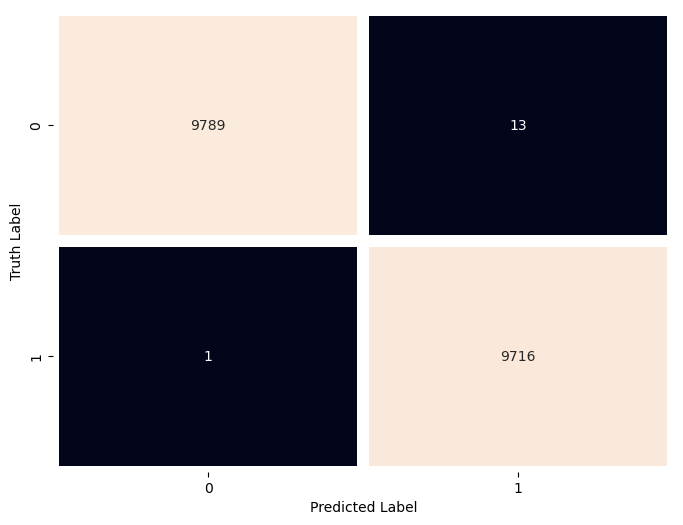

In [68]:
import seaborn as sns
c_m = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(c_m, annot=True, linewidths=8.5 , fmt= '', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [69]:
from joblib import dump, load

In [70]:
dump(model, 'Randomforest.joblib')

['Randomforest.joblib']

### Model Evaluation